In [23]:
# Import libraries
import pandas as pd
import numpy as np
import random
import sys
from pathlib import Path
import shutil
import kagglehub
import os

# Set display options for pandas
pd.set_option('display.max_rows', 100)  # Set the maximum number of rows to display
pd.set_option('display.max_columns', 100)  # Set the maximum number of columns to display
pd.set_option("display.float_format", "{:,.0f}".format)

# # import modules
# parent_directory = Path().resolve().parent
# sys.path.append(str(parent_directory))

from importlib import reload
import python_scripts.decision_tree as decision_tree
import python_scripts.node as node
import python_scripts.decision_tree_graph as decision_tree_graph
import python_scripts.random_forest as random_forest
import python_scripts.gradient_boosting as gradient_boosting
reload(decision_tree)
reload(node)
reload(decision_tree_graph)
reload(random_forest)
reload(gradient_boosting)
from python_scripts.decision_tree import DecisionTree
from python_scripts.decision_tree_graph import DecisionTreeGraph
from python_scripts.random_forest import RandomForest
from python_scripts.gradient_boosting import GradientBoosting

# Do this to get Graphviz working
graphviz_bin = r"C:\Program Files\Graphviz\bin"
os.environ["PATH"] = graphviz_bin + ";" + os.environ.get("PATH", "")

In [16]:
def donwload_data_from_kaggle(kaggle_path, local_rel_path):

  local_path = Path.cwd() / 'data'
  local_path.mkdir(exist_ok=True)
  local_path = Path.cwd() / local_rel_path
  local_path.mkdir(exist_ok=True)

  downloaded_path = Path(kagglehub.dataset_download(kaggle_path))

  # Copy files into your repo data/ folder
  for item in downloaded_path.iterdir():
    dest = local_path / item.name
    if item.is_dir():
      shutil.copytree(item, dest, dirs_exist_ok=True)
    else:
      shutil.copy2(item, dest)

# The mobile price is a classification problem
donwload_data_from_kaggle("iabhishekofficial/mobile-price-classification", 'data/mobile_phones')
# The insurance dataset is a continuous problem
donwload_data_from_kaggle("willianoliveiragibin/healthcare-insurance", 'data/insurance')

In [17]:
insurance_df = pd.read_csv('./data/insurance/insurance.csv')

# Shuffle the dataframe
df_shuffled = insurance_df.sample(frac=1, random_state=42)

# Calculate the split index
split_index = int(len(df_shuffled) * 0.8)
# Create train and test sets
train_df = df_shuffled[:split_index]
test_df = df_shuffled[split_index:]

# Target variable processing
y_train = pd.DataFrame(train_df['charges'].copy())
X_train = train_df.drop(columns=['charges'])
y_test = pd.DataFrame(test_df['charges'].copy())
X_test = test_df.drop(columns=['charges'])

In [18]:
X_test.head()

,age,sex,bmi,children,smoker,region
517,45,male,30,2,no,northwest
1069,54,female,32,1,no,southeast
476,24,male,28,0,yes,northeast
157,18,male,25,0,yes,northeast
16,52,female,31,1,no,northeast


In [19]:
# Display metadatWa of the datasets
print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Train dataset shape: (1070, 7)
Test dataset shape: (268, 7)


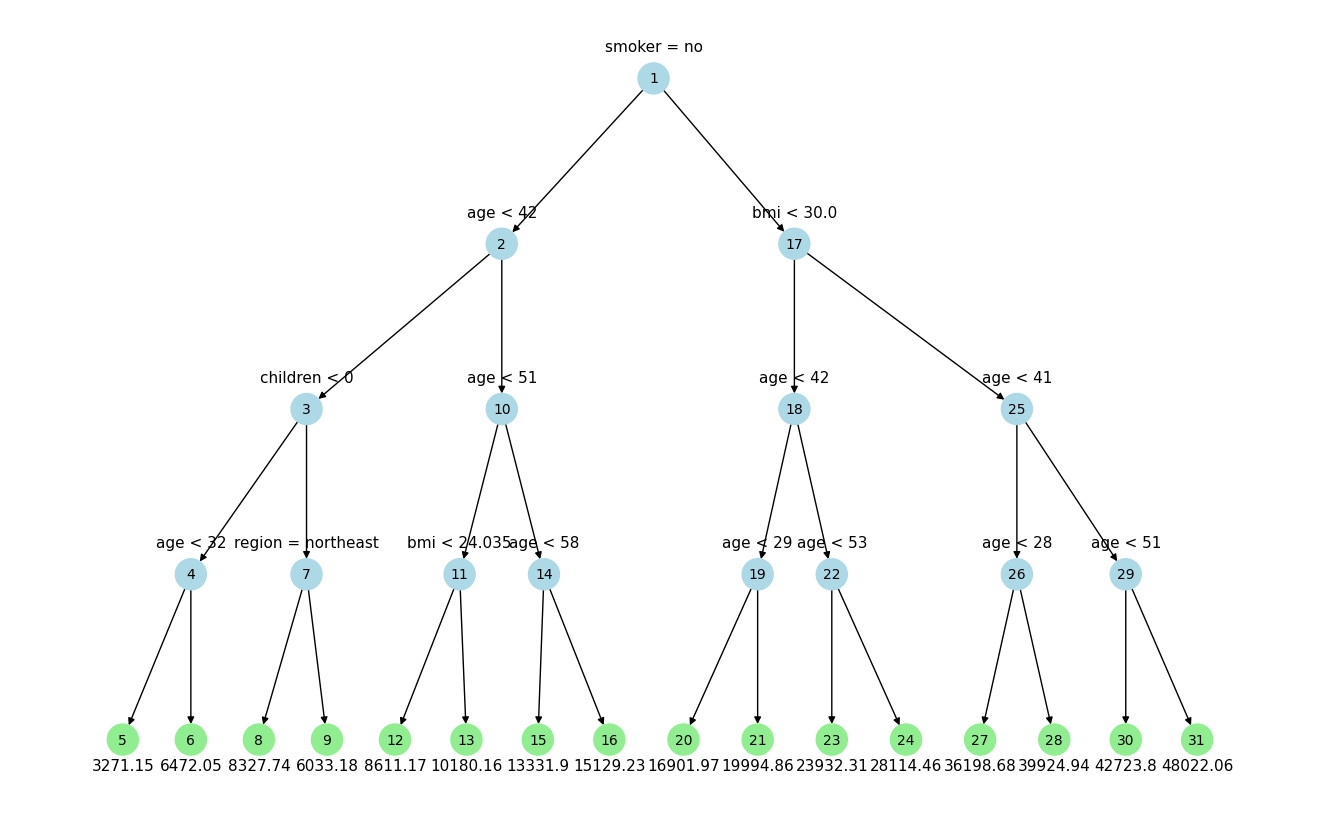

In [20]:
# Decision Tree

decision_tree = DecisionTree(
    problem_type='regression',
    criterion='variance',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=2,
    )

dc_model = decision_tree.train(X_train, y_train)
y_pred = decision_tree.predict(dc_model, X_test)

X_test['y_truth'] = y_test
X_test['y_pred'] = y_pred
X_test['abs_err'] = abs(X_test['y_pred'] - X_test['y_truth'])
X_test['bias'] = X_test['y_pred'] - X_test['y_truth']

decision_tree_graph = DecisionTreeGraph()
decision_tree_graph.visualise(dc_model, X_dtypes=X_train.dtypes)

In [24]:
# Random Forest

random_forest = RandomForest(
    n_estimators=3,
    problem_type='regression',
    criterion='variance',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=2,
    )

rf_model = random_forest.train(X_train, y_train)
y_pred = random_forest.predict(rf_model, X_test)

X_test['y_truth'] = y_test
X_test['y_pred'] = y_pred
X_test['abs_err'] = abs(X_test['y_pred'] - X_test['y_truth'])
X_test['bias'] = X_test['y_pred'] - X_test['y_truth']

1
2
3


In [25]:
# Gradient Boosting

gradient_boosting = GradientBoosting(
    n_estimators=20,
    learning_rate = 0.5,
    problem_type='regression',
    criterion='squared_error',
    max_depth=3,
    min_samples_split=10,
    min_samples_leaf=2,
    )

gb_model = gradient_boosting.train(X_train, y_train)
y_pred = gradient_boosting.predict(gb_model, X_test)

X_test['y_truth'] = y_test
X_test['y_pred'] = y_pred
X_test['abs_err'] = abs(X_test['y_pred'] - X_test['y_truth'])
X_test['bias'] = X_test['y_pred'] - X_test['y_truth']

tree_num 1
tree_num 2
tree_num 3
tree_num 4
tree_num 5
tree_num 6
tree_num 7
tree_num 8
tree_num 9
tree_num 10
tree_num 11
tree_num 12
tree_num 13
tree_num 14
tree_num 15
tree_num 16
tree_num 17
tree_num 18
tree_num 19
tree_num 20


In [26]:
y_pred

array([10050.70189473, 10535.98220939, 26881.10680247, 21710.07970741,
       10050.70189473,  5424.74757742,  7411.01327087, 10050.70189473,
       18360.98591227,  5424.74757742, 43908.98040049, 10050.70189473,
        7411.01327087, 12446.41888605,  6029.79937739, 12446.41888605,
       13771.81380023, 10050.70189473, 32187.20397676,  8722.94982805,
        2789.67371414,  7411.01327087, 25222.11685148,  4280.91410054,
       10050.70189473,  5128.99501169, 13997.84288609, 17871.56047152,
       10882.48322584, 10050.70189473, 27108.83160102,  7411.01327087,
        9368.12405412, 30161.82738071, 31329.68553597,  6110.63963923,
        7411.01327087,  7757.51428732,  9368.12405412,  7411.01327087,
        8797.41309862, 12541.7543977 , 15782.53358507, 32187.20397676,
         414.4390124 , 17851.27440872, 30844.40522131, 10050.70189473,
       10050.70189473, 30161.82738071, 30844.40522131, 10050.70189473,
        9368.12405412,  6087.40347588,  4124.60640252,  6619.02656305,
      